#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [103]:
from sklearn.datasets import load_boston
from  sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,levene,bartlett,mannwhitneyu
import math
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.power import ttest_power

import seaborn as sns
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
boston=load_boston()
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as smi
import statsmodels.tsa.api as smt
from scipy import stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from sklearn.feature_selection import RFE
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff

ModuleNotFoundError: No module named 'plotly'

### 1.2 Read the dataset(PlayTennis.csv):

In [64]:
df=pd.read_csv('C:/Users/bhavna singh/Downloads/PlayTennis.csv')

### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [65]:
df
number=preprocessing.LabelEncoder()
df['Outlook']=number.fit_transform(df['Outlook'])
df['Temperature']=number.fit_transform(df['Temperature'])
df['Humidity']=number.fit_transform(df['Humidity'])
df['Wind']=number.fit_transform(df['Wind'])
df['Play Tennis']=number.fit_transform(df['Play Tennis'])
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [66]:
X=df.drop('Play Tennis',axis=1)
Y=df['Play Tennis']

### 1.5 Visualize the data:(countplot)

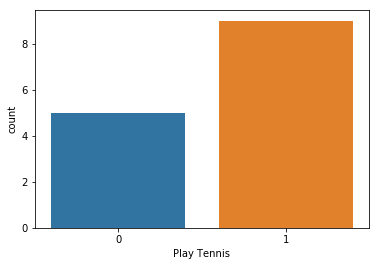

In [67]:
sns.countplot(x='Play Tennis',data=df)

### 1.6 Split the data into train and test set:(70/30)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

### 1.7 Train a knn

In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
#x,y=df.loc[:,df.columns!='class'],df.loc[:,'class']
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
knn.score(x_test,y_test)

0.6

In [70]:
knn.score(x_train,y_train)

0.6666666666666666

### 1.8 Predict the model:

In [71]:
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1])

### 1.9 Evaluation the model:(classification_report)

In [72]:
print('classification_report:',classification_report(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

accuracy_score: 0.6


# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [73]:
df1=pd.read_csv('C:/Users/bhavna singh/Desktop/data science/datasets/diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Find out the feature columns

In [74]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 2.3 Extract the independent variable X and dependent variable Y?

In [75]:
x=df1.drop('Outcome',axis=1)
y=df1.Outcome

### 2.4 Split the data into train and test set:(70/30)

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### 2.5 Train a GaussianNB?

In [77]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)


0.7672253258845437

### 2.6 Predict the model:

In [78]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

### 2.7 Evaluation the model:(classification_report)

In [79]:
print('classification_report:',classification_report(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.62      0.58      0.60        81

   micro avg       0.73      0.73      0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231

accuracy_score: 0.7272727272727273


### 2.8 Conclusion:



According to score,the model is perfect. TRAIN IS APPROXIMATELY EQUAL TO TEST

### 2.9 Confusion matrix

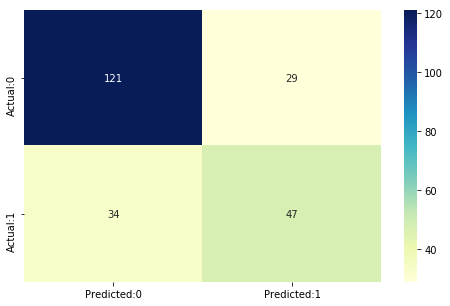

In [80]:
# this produces a 2x2 numpy array (matrix)
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

In [81]:
ys = np.array(y_test.values)
predict = np.array(y_pred)

ys = ys[:25]
predict = predict[:25]
check = (ys.flatten() == predict)
correctly_classified = np.count_nonzero(check)
incorrectly_classed = np.count_nonzero(~check)
print('correctly classified :',correctly_classified)
print('incorrectly classified :',incorrectly_classed)

correctly classified : 22
incorrectly classified : 3


### 2.12 save confusion matrix and slice into four pieces

In [83]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('true +:',TP)
print('true -:',TN)
print('false +:',FN)
print('flase -',FP)

true +: 47
true -: 121
false +: 34
flase - 29


### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [84]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.7272727272727273 

 The Miss-classification = 1-Accuracy =  0.2727272727272727 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.5802469135802469 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8066666666666666 

 Positive Predictive value = TP / (TP+FP) =  0.618421052631579 

 Negative predictive Value = TN / (TN+FN) =  0.7806451612903226 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  3.0012771392081734 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.5203550658096112


From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.

Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [87]:
total = TP+TN+FP+FN
accuracy = (TP + TN)/total
accuracy
miss = (FP+FN)/total
miss

0.2727272727272727

Sensitivity: When the actual value is positive, how often is the prediction correct?



In [88]:
actual_positive = TP+FN
sensitivity = TP/actual_positive
sensitivity

0.5802469135802469

Specificity: When the actual value is negative, how often is the prediction correct?



In [89]:
actual_negative = FP+TN
specificity = TN/actual_negative
specificity

0.8066666666666666

False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [90]:
fpr = 1 -specificity
fpr

0.19333333333333336

Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [91]:
correct_positive = TP
positives_by_model=TP+FP
precision = correct_positive/positives_by_model
precision


0.618421052631579

### 2.14 Adjusting the classification threshold?

In [92]:
zero_prior = 500/(500+268)
one_prior = 268/(500+268)
gauss_thershold = GaussianNB(priors=[zero_prior,one_prior])
gauss_thershold.fit(x_train,y_train)
# predictions 
probs = gauss_thershold.predict_proba(x_test)
prediction = gauss_thershold.predict(x_test)
probs_df = pd.DataFrame(probs,columns=['prob0','prob1'])
output = pd.DataFrame(prediction,columns=['predicted'])
threshold_df = pd.concat([probs_df,output],axis=1)
threshold_df.sample(10)

,prob0,prob1,predicted
100,0.740070,0.259930,0
202,0.446742,0.553258,1
164,0.976674,0.023326,0
99,0.280565,0.719435,1
51,0.894362,0.105638,0
56,0.994371,0.005629,0
11,0.318435,0.681565,1
128,0.591140,0.408860,0
20,0.949882,0.050118,0
200,0.691736,0.308264,0


#### print the first 10 predicted responses?

In [93]:
threshold_df.head(10)

,prob0,prob1,predicted
0,0.912858,0.087142,0
1,0.012719,0.987281,1
2,0.473926,0.526074,1
3,0.999473,0.000527,0
4,0.947329,0.052671,0
5,0.172182,0.827818,1
6,0.001631,0.998369,1
7,0.942590,0.057410,0
8,0.544774,0.455226,0
9,0.962128,0.037872,0


#### print the first 10 predicted probabilities of class membership

In [94]:
threshold_df[threshold_df['predicted']==1].head(10)

,prob0,prob1,predicted
1,0.012719,0.987281,1
2,0.473926,0.526074,1
5,0.172182,0.827818,1
6,0.001631,0.998369,1
11,0.318435,0.681565,1
13,0.036901,0.963099,1
14,0.164156,0.835844,1
15,0.126448,0.873552,1
21,0.290678,0.709322,1
23,0.239803,0.760197,1


#### print the first 10 predicted probabilities for class 1

In [95]:
threshold_df[threshold_df['predicted']==1][['prob0','prob1']].head()

,prob0,prob1
1,0.012719,0.987281
2,0.473926,0.526074
5,0.172182,0.827818
6,0.001631,0.998369
11,0.318435,0.681565


#### store the predicted probabilities for class 1

In [96]:
probs1 = threshold_df['prob1']

#### plot histogram of predicted probabilities

#### create 8 bins

In [106]:
fig = px.histogram(threshold_df,x='prob1',color='predicted',title='Histogram of predicted probabilities with threshold = 0.5')
fig.show()

NameError: name 'px' is not defined

### print the first 10 predicted probabilities

In [107]:
threshold_df.head(10)

,prob0,prob1,predicted
0,0.912858,0.087142,0
1,0.012719,0.987281,1
2,0.473926,0.526074,1
3,0.999473,0.000527,0
4,0.947329,0.052671,0
5,0.172182,0.827818,1
6,0.001631,0.998369,1
7,0.942590,0.057410,0
8,0.544774,0.455226,0
9,0.962128,0.037872,0


### create new confusion matrix 

In [111]:

_,sensitivity,specificity = validate_threshold(threshold_df[['prob1']],y_test)
s1= np.array(sensitivity)[::-1] # plotted from 100% threshold to 0 for p(y=1|x)
s2 = np.array(specificity)[::-1]
fpr = 1-s2



### 2.14 Receiver Operating Characteristic (ROC) Curves

#### define a function that accepts a threshold and prints sensitivity and specificity

In [113]:
def validate_threshold(probs,y_test):
    pred = []
    sens = []
    spec = [] 
    for thresh_value in range(0,11) : # trying 0 and 1  for start and stop points
        predictions =  probs[probs.columns[0]].apply(lambda x:1 if x>(thresh_value/10) else 0)
        # confusion matrix for each thresh hold value 
        cm = confusion_matrix(y_test,predictions)
        tp = cm[1,1]
        tn = cm[0,0]
        fp = cm[0,1]
        fn = cm[1,0]
        actual_positive = tp+fn
        sensitivity = tp/actual_positive
        actual_negative = fp+tn
        specificity = tn/actual_negative
        
        pred.append(predictions)
        sens.append(sensitivity)
        spec.append(specificity)
        
        
    return pred,sens,spec

# 3. What is advantages Confusion matrix and ROC/AUC?

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.